In [586]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [587]:
#Read in the csv file and convert to a Pandas dataframe4
RiyadhVillasAqar = pd.read_csv('Data/RiyadhVillasAqar.csv', low_memory=False) # unknown
Riyadh_Aqqar = pd.read_excel('Data/Riyadh_Aqqar.xlsx') # unknown 
Riyadh_Aqqar_Villas = pd.read_excel('Data/Riyadh_Aqqar.xlsx' , sheet_name = 'Villas (الفلل)') # unknown
Riyadh_Aqqar_Apartments = pd.read_excel('Data/Riyadh_Aqqar.xlsx' , sheet_name = 'Apartments (الشقق)')
realEstate = pd.read_csv('Data/realEstate.csv') # It's written in kaggle 2022

In [588]:
realEstate1 = pd.read_csv('Data/realEstate.csv') # It's written in kaggle 2022

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [589]:
RiyadhVillasAqar.head(5)

,Unnamed: 0,front,rooms,lounges,bathrooms,streetWidth,stairs,propertyAge,driverRoom,tent,patio,kitchen,outdoorRoom,garage,duplex,space,apartments,maidRoom,elevator,furnihsed,pool,basement,neighbourhood,location,price,square price
0,0,شرقية,5,4,5+,20.0,1,0,1,1,1,1,1,1,1,300,0,0,0,0,0,0,عكاظ,جنوب الرياض,1050000.0,3500.000000
1,1,غربية,4,3,5+,20.0,1,0,1,1,1,1,1,1,0,540,2,1,1,0,0,0,المهدية,غرب الرياض,3000000.0,5555.555556
2,2,جنوبية شرقية,7,2,5+,15.0,1,31,1,0,1,1,1,1,0,875,0,1,0,0,0,0,الشفا,جنوب الرياض,2000000.0,2285.714286
3,3,غربية,7,3,5+,15.0,1,3,0,1,1,1,0,1,1,200,0,1,0,1,0,0,ظهرة لبن,غرب الرياض,894000.0,4470.000000
4,4,شمالية,4,2,4,25.0,1,0,1,1,1,1,1,1,0,400,3,1,1,1,0,0,قرطبة,شرق الرياض,3500000.0,8750.000000


## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [590]:
realEstate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6762 entries, 0 to 6761
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          6762 non-null   int64  
 1   id               6762 non-null   int64  
 2   title            6762 non-null   object 
 3   price            6762 non-null   int64  
 4   content          6668 non-null   object 
 5   imgs             6119 non-null   object 
 6   refresh          6762 non-null   object 
 7   beds             6762 non-null   int64  
 8   livings          6760 non-null   float64
 9   wc               6762 non-null   int64  
 10  area             6587 non-null   float64
 11  street_width     6552 non-null   float64
 12  age              6057 non-null   float64
 13  last_update      6762 non-null   object 
 14  ketchen          6745 non-null   float64
 15  ac               6743 non-null   float64
 16  furnished        6717 non-null   float64
 17  location      

In [591]:
realEstate1['title'].value_counts()

title
شقة للإيجار في حي الياسمين ، الرياض ، الرياض                                                                   127
شقة للإيجار في حي المونسية ، الرياض ، الرياض                                                                    82
شقة للإيجار في حي النرجس ، الرياض ، الرياض                                                                      53
شقة للإيجار في حي العارض ، الرياض ، الرياض                                                                      48
شقة للإيجار في حي الملقا ، الرياض ، الرياض                                                                      43
شقة للإيجار في شارع ابي جعفر المنصور ، حي اليرموك ، الرياض ، الرياض                                             42
شقة للإيجار في حي اليرموك ، الرياض ، الرياض                                                                     41
شقة للإيجار في شارع طريف ، حي النرجس ، الرياض ، الرياض                                                          40
شقة للإيجار في شارع قلعة الفسطاط ، حي اشبيلية ، الرياض ، الرياض           

## RiyadhVillasAqar

In [592]:
RiyadhVillasAqar.head(1)

,Unnamed: 0,front,rooms,lounges,bathrooms,streetWidth,stairs,propertyAge,driverRoom,tent,patio,kitchen,outdoorRoom,garage,duplex,space,apartments,maidRoom,elevator,furnihsed,pool,basement,neighbourhood,location,price,square price
0,0,شرقية,5,4,5+,20.0,1,0,1,1,1,1,1,1,1,300,0,0,0,0,0,0,عكاظ,جنوب الرياض,1050000.0,3500.0


## Riyadh_Aqqar_sheets

In [593]:
Riyadh_Aqqar.head(1)

,نوع العقار,الغرض,المدينة,الحي,الواجهة,المساحة,سعر المتر,السعر الإجمالي
0,أرض,NaN,امارة منطقة الرياض,الرياض,غربية,375,2900.0,1087500


In [594]:
Riyadh_Aqqar_Apartments.head(10)
# Staris (الدور) -> conisity
# City -> Remove The column

,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,المساحة,مطبخ,مدخل سيارة,مصعد,الدور,عمر العقار,مؤثثة,السعر الاجمالي
0,شقة,الرياض,حي المروج,جنوبية,4,1.0,3,249,1,0,1,3,0.0,0,1434000
1,شقة,الرياض,حي العارض,شمالية غربية,3,1.0,3,199,0,0,1,علوي,0.0,0,980000
2,شقة,الرياض,حي النرجس,NaN,3,1.0,3,145,1,0,1,أرضي,2.0,0,1050000
3,شقة,الرياض,حي النرجس,شمالية,3,1.0,3,101,1,0,0,أرضي,0.0,1,1200000
4,شقة,الرياض,حي الياسمين,شرقية,4,1.0,3,147,1,0,1,علوي,2.0,1,1200000
5,شقة,الرياض,حي الياسمين,NaN,3,1.0,2,118,1,0,1,3,0.0,0,850000
6,شقة,الرياض,حي النرجس,شرقية,3,1.0,3,112,1,0,0,أرضي,0.0,0,885000
7,شقة,الرياض,حي النرجس,شرقية,2,1.0,3,100,1,0,1,3,0.0,0,1200000
8,شقة,الرياض,حي النرجس,جنوبية شرقية,3,1.0,3,170,1,0,1,ثالث,NaN,1,930000
9,شقة,الرياض,حي العقيق,NaN,3,1.0,3,115,0,1,1,NaN,11.0,0,1100000


In [595]:
Riyadh_Aqqar_Villas.head(1)

,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,عرض الشارع,المساحة,درج صالة,مطبخ,غرفة خادمة,غرفة سائق,ملحق,حوش,مسبح,قبو,مدخل سيارة,مصعد,السعر الاجمالي
0,فيلا,الرياض,حي العارض,جنوبية,6,3,5+,NaN,244.0,1,1,1,1,0,1,0,0,1,1,2300000


In [596]:
pd.set_option('display.max_columns', None)
realEstate.head(1)

,user_id,id,title,price,content,imgs,refresh,beds,livings,wc,area,street_width,age,last_update,ketchen,ac,furnished,location,path,district,width,length,advertiser_type,create_time,review,profileImg,UserName,iam_verified,onMarket,IsRent
0,1495817,4596035,شقة للإيجار في شارع التغلبي ، حي النظيم ، الري...,20000,1666 كل شهر,"['014958174_1659666836308.jpg', '014958178_165...","['2022-08-06', '12:22:15']",3,0.0,2,225.0,15.0,9.0,"['2022-08-06', '12:22:15']",1.0,0.0,0.0,"{'lat': 24.80093, 'lng': 46.89689, '__typename...",/شقق-للإيجار/الرياض/شرق-الرياض/حي-النظيم/شارع-...,حي النظيم,15.0,15.0,owner,"['2022-08-05', '02:44:23']",5.0,NaN,Thamer,True,17,False


In [597]:
print(RiyadhVillasAqar.columns)
print("------------------------")
print(Riyadh_Aqqar_Apartments.columns)
print("------------------------")
print(Riyadh_Aqqar_Villas.columns)
print("------------------------")
print(Riyadh_Aqqar.columns)
print("------------------------")
print(realEstate.columns)

Index(['Unnamed: 0', 'front', 'rooms', 'lounges', 'bathrooms', 'streetWidth',
       'stairs', 'propertyAge', 'driverRoom', 'tent', 'patio', 'kitchen',
       'outdoorRoom', 'garage', 'duplex', 'space', 'apartments', 'maidRoom',
       'elevator', 'furnihsed', 'pool', 'basement', 'neighbourhood',
       'location', 'price', 'square price'],
      dtype='object')
------------------------
Index(['نوع العقار', 'المدينة', 'الحي', 'الواجهة', 'عدد الغرف', 'عدد الصالات',
       'عدد الحمامات', 'المساحة', 'مطبخ', 'مدخل سيارة', 'مصعد', 'الدور',
       'عمر العقار', 'مؤثثة', 'السعر الاجمالي'],
      dtype='object')
------------------------
Index(['نوع العقار', 'المدينة', 'الحي', 'الواجهة', 'عدد الغرف', 'عدد الصالات',
       'عدد الحمامات', 'عرض الشارع', 'المساحة', 'درج صالة', 'مطبخ',
       'غرفة خادمة', 'غرفة سائق', 'ملحق', 'حوش', 'مسبح', 'قبو', 'مدخل سيارة',
       'مصعد', 'السعر الاجمالي'],
      dtype='object')
------------------------
Index(['نوع العقار', 'الغرض', 'المدينة', 'الحي', 'الواجه

In [598]:
RiyadhVillasAqar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46826 entries, 0 to 46825
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     46826 non-null  int64  
 1   front          46826 non-null  object 
 2   rooms          46826 non-null  int64  
 3   lounges        45708 non-null  object 
 4   bathrooms      46826 non-null  object 
 5   streetWidth    46636 non-null  float64
 6   stairs         46826 non-null  int64  
 7   propertyAge    46826 non-null  int64  
 8   driverRoom     46826 non-null  int64  
 9   tent           46826 non-null  int64  
 10  patio          46826 non-null  int64  
 11  kitchen        46826 non-null  int64  
 12  outdoorRoom    46826 non-null  int64  
 13  garage         46826 non-null  int64  
 14  duplex         46826 non-null  int64  
 15  space          46826 non-null  int64  
 16  apartments     46826 non-null  object 
 17  maidRoom       46826 non-null  int64  
 18  elevat

In [599]:
Riyadh_Aqqar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   نوع العقار      2155 non-null   object 
 1   الغرض           2106 non-null   object 
 2   المدينة         2155 non-null   object 
 3   الحي            2155 non-null   object 
 4   الواجهة         2155 non-null   object 
 5   المساحة         2155 non-null   int64  
 6   سعر المتر       2155 non-null   float64
 7   السعر الإجمالي  2155 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 134.8+ KB


In [600]:
Riyadh_Aqqar_Apartments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   نوع العقار      551 non-null    object 
 1   المدينة         551 non-null    object 
 2   الحي            551 non-null    object 
 3   الواجهة         389 non-null    object 
 4   عدد الغرف       551 non-null    int64  
 5   عدد الصالات     541 non-null    float64
 6   عدد الحمامات    551 non-null    object 
 7   المساحة         551 non-null    int64  
 8   مطبخ            551 non-null    int64  
 9   مدخل سيارة      551 non-null    int64  
 10  مصعد            551 non-null    int64  
 11  الدور           477 non-null    object 
 12  عمر العقار      550 non-null    float64
 13  مؤثثة           551 non-null    int64  
 14  السعر الاجمالي  551 non-null    int64  
dtypes: float64(2), int64(7), object(6)
memory usage: 64.7+ KB


In [601]:
Riyadh_Aqqar_Villas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1090 entries, 0 to 1089
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   نوع العقار      1090 non-null   object 
 1   المدينة         1090 non-null   object 
 2   الحي            1090 non-null   object 
 3   الواجهة         1059 non-null   object 
 4   عدد الغرف       993 non-null    object 
 5   عدد الصالات     967 non-null    object 
 6   عدد الحمامات    993 non-null    object 
 7   عرض الشارع      465 non-null    float64
 8   المساحة         1059 non-null   float64
 9   درج صالة        1090 non-null   int64  
 10  مطبخ            1090 non-null   int64  
 11  غرفة خادمة      1090 non-null   int64  
 12  غرفة سائق       1090 non-null   int64  
 13  ملحق            1090 non-null   int64  
 14  حوش             1090 non-null   int64  
 15  مسبح            1090 non-null   int64  
 16  قبو             1090 non-null   int64  
 17  مدخل سيارة      1090 non-null   i

In [602]:
# RiyadhVillasAqar[RiyadhVillasAqar.duplicated(keep=False)].sort_values(by = 'space')

In [603]:
realEstate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6762 entries, 0 to 6761
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          6762 non-null   int64  
 1   id               6762 non-null   int64  
 2   title            6762 non-null   object 
 3   price            6762 non-null   int64  
 4   content          6668 non-null   object 
 5   imgs             6119 non-null   object 
 6   refresh          6762 non-null   object 
 7   beds             6762 non-null   int64  
 8   livings          6760 non-null   float64
 9   wc               6762 non-null   int64  
 10  area             6587 non-null   float64
 11  street_width     6552 non-null   float64
 12  age              6057 non-null   float64
 13  last_update      6762 non-null   object 
 14  ketchen          6745 non-null   float64
 15  ac               6743 non-null   float64
 16  furnished        6717 non-null   float64
 17  location      

In [604]:
realEstate['content'][10]

'يوجد شقه 🥀 للايجار عوائل 🏕️ مكونه من 💐\r\n\r\nغرفه نوم ⭐⭐⭐\r\nومطبخ 🌺 مستقل 🥀\r\nوحمام 🌹\r\nومكيفات 🌴 اسبلت جديد 🌹\r\nالتشطيب ممتاز بجد 🥀\r\nالشارع به جاميع الخدمات 🌉\r\nالعماره عوائل 🌾\r\nالرجاء في عدم الرد ✉️ ارسال رساله عل وتساب 🌹\r\n\r\nالسعر 20الف ريال دفعتين فقط 🌱\r\n👈👈👈👈.    بسام.    👉👉👉👉'

The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [605]:
# We have verified the reliability of the datasets and confirmed that they originate from Saudi real estate websites ex: "Aqar website and Bayut website" based on the structure and data patterns, 
# Including neighborhood names, property details, and trends.

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [606]:
# The First Dataset (RiyadhVillasAqar) is Unknown
# The Second Dataset (Riyadh_Aqqar) is Unknown
# The Third Dataset (RiyadhVillasAqar) It's written in kaggle 2022 so we confirmed the period is 2022
# So the conclusion is:
# The timeline for one of the datasets was identified as 2022 based on the available data. 
# For the remaining two datasets, while no specific timeline was found, they were uploaded to Kaggle two years ago.
# Which suggests they could potentially align with the '2022' timeframe.

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [607]:
# For consistency, all datasets contained the necessary columns with logical meanings, but formatting adjustments were required to align them. 
# This included renaming columns and standardizing data types to ensure accurate comparisons across all three datasets.

In [608]:
# Rename the Riyadh_Aqqar columns to English names
Riyadh_Aqqar.rename(columns={
    "نوع العقار": "Property Type",
    "الغرض": "Purpose",
    "المدينة": "City",
    "الحي": "District",
    "الواجهة": "Front",
    "المساحة": "Area",
    "سعر المتر": "Square Price",
    "السعر الإجمالي": "Price"
}, inplace=True)
Riyadh_Aqqar.columns

Index(['Property Type', 'Purpose', 'City', 'District', 'Front', 'Area',
       'Square Price', 'Price'],
      dtype='object')

In [609]:
# Rename the Riyadh_Aqqar_Villas columns to English names
Riyadh_Aqqar_Villas = Riyadh_Aqqar_Villas.rename(columns={
    'نوع العقار': 'Property Type',
    'المدينة': 'City',
    'الحي': 'District',
    'الواجهة': 'Frontage',
    'عدد الغرف': 'Number of Rooms',
    'عدد الصالات': 'Number of Living Rooms',
    'عدد الحمامات': 'Number of Bathrooms',
    'عرض الشارع': 'Street Width',
    'المساحة': 'Area',
    'درج صالة': 'Staircase',
    'مطبخ': 'Kitchen',
    'غرفة خادمة': 'Maid Room',
    'غرفة سائق': 'Driver Room',
    'ملحق': 'Annex',
    'حوش': 'Courtyard',
    'مسبح': 'Swimming Pool',
    'قبو': 'Basement',
    'مدخل سيارة': 'Car Entrance',
    'مصعد': 'Elevator',
    'السعر الاجمالي': 'Total Price'
})

# Check the updated column names
Riyadh_Aqqar_Villas.columns

Index(['Property Type', 'City', 'District', 'Frontage', 'Number of Rooms',
       'Number of Living Rooms', 'Number of Bathrooms', 'Street Width', 'Area',
       'Staircase', 'Kitchen', 'Maid Room', 'Driver Room', 'Annex',
       'Courtyard', 'Swimming Pool', 'Basement', 'Car Entrance', 'Elevator',
       'Total Price'],
      dtype='object')

In [610]:
#  Rename the Riyadh_Aqqar_Apartments columns to English names
Riyadh_Aqqar_Apartments = Riyadh_Aqqar_Apartments.rename(columns={
    'نوع العقار': 'Property Type',
    'المدينة': 'City',
    'الحي': 'District',
    'الواجهة': 'Frontage',
    'عدد الغرف': 'Number of Rooms',
    'عدد الصالات': 'Number of Living Rooms',
    'عدد الحمامات': 'Number of Bathrooms',
    'المساحة': 'Area',
    'مطبخ': 'Kitchen',
    'مدخل سيارة': 'Car Entrance',
    'مصعد': 'Elevator',
    'الدور': 'Floor',
    'عمر العقار': 'Property Age',
    'مؤثثة': 'Furnished',
    'السعر الاجمالي': 'Total Price'
})

# Check the updated column names
Riyadh_Aqqar_Villas.columns

Index(['Property Type', 'City', 'District', 'Frontage', 'Number of Rooms',
       'Number of Living Rooms', 'Number of Bathrooms', 'Street Width', 'Area',
       'Staircase', 'Kitchen', 'Maid Room', 'Driver Room', 'Annex',
       'Courtyard', 'Swimming Pool', 'Basement', 'Car Entrance', 'Elevator',
       'Total Price'],
      dtype='object')

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [611]:
# Sample: 
# All three datasets are relevant as they focus on real estate properties within Riyadh. 
# This alignment ensures that the data is contextually appropriate for addressing questions about housing trends, property characteristics, and neighborhood distributions in the city.
# Columns: 
# realstate Dataset: We decaied to drop the following columns: 'review', 'profileImg', 'UserName', 'iam_verified', 'content', 'imgs'.
# RiyadhVillasAqar Dataset: 'Unnamed: 0'.


In [612]:
# outliras 
RiyadhVillasAqar['apartments'].value_counts()
# More then 10 apartment consider outliras

apartments
0      26809
1       9373
2       8435
3       1703
4        411
5         29
6         12
8          9
7          7
10         7
12         6
15         5
11         4
30+        4
13         3
14         3
23         2
20         2
9          1
16         1
Name: count, dtype: int64

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


## realEstate

In [613]:
from ydata_profiling import ProfileReport

# profile = ProfileReport(realEstate, title="Data Profiling Report", explorative=True)
# profile.to_file("output_report.html")

# There 0 dupliacte values
# There a lot missing values we need to look further into it

In [614]:
realEstate.duplicated(keep=False).sum()

0

In [615]:
realEstate['id'].duplicated(keep=False).sum()

0

In [616]:
realEstate['user_id'].duplicated(keep=False).sum()

5619

## RiyadhVillasAqar

In [617]:
# profile = ProfileReport(RiyadhVillasAqar, title="Data Profiling Report", explorative=True)
# profile.to_file("output_report1.html")
# There no dupliacte values
# There a lot missing values in columns 'lounges' we need to look further into it 

In [618]:
RiyadhVillasAqar.duplicated(keep=False).sum()

0

In [619]:
RiyadhVillasAqar[RiyadhVillasAqar.duplicated(keep=False)].sort_values(by = 'space')

,Unnamed: 0,front,rooms,lounges,bathrooms,streetWidth,stairs,propertyAge,driverRoom,tent,patio,kitchen,outdoorRoom,garage,duplex,space,apartments,maidRoom,elevator,furnihsed,pool,basement,neighbourhood,location,price,square price


## Riyadh_Aqqar

In [620]:
# profile = ProfileReport(Riyadh_Aqqar, title="Data Profiling Report", explorative=True)
# profile.to_file("output_report2.html")


In [621]:
Riyadh_Aqqar.duplicated(keep=False).sum()

469

In [622]:
Riyadh_Aqqar[Riyadh_Aqqar.duplicated(keep=False)].sort_values(by = 'Area')

,Property Type,Purpose,City,District,Front,Area,Square Price,Price
95,أرض,سكني,الرياض,حي السعادة,جنوبية,90,2500.0,225000
716,أرض,سكني,الرياض,حي السعادة,جنوبية,90,2500.0,225000
529,أرض,سكني,امارة منطقة الرياض,الرياض,جنوبية غربية,218,1650.0,359700
38,أرض,سكني,امارة منطقة الرياض,الرياض,جنوبية غربية,218,1650.0,359700
266,أرض,سكني,امارة منطقة الرياض,الرياض,شمالية شرقية,234,3100.0,725400
265,أرض,سكني,امارة منطقة الرياض,الرياض,شمالية شرقية,234,3100.0,725400
1299,أرض,سكني,امارة منطقة الرياض,الرياض,شمالية شرقية,234,3100.0,725400
39,أرض,سكني,امارة منطقة الرياض,الرياض,غربية,239,1650.0,394350
213,أرض,سكني,امارة منطقة الرياض,الرياض,غربية,239,1600.0,382400
1122,أرض,سكني,امارة منطقة الرياض,الرياض,غربية,239,1600.0,382400


In [623]:
Riyadh_Aqqar.head(1)

,Property Type,Purpose,City,District,Front,Area,Square Price,Price
0,أرض,NaN,امارة منطقة الرياض,الرياض,غربية,375,2900.0,1087500


In [624]:
Riyadh_Aqqar_Apartments.head(1)

,Property Type,City,District,Frontage,Number of Rooms,Number of Living Rooms,Number of Bathrooms,Area,Kitchen,Car Entrance,Elevator,Floor,Property Age,Furnished,Total Price
0,شقة,الرياض,حي المروج,جنوبية,4,1.0,3,249,1,0,1,3,0.0,0,1434000


In [625]:
Riyadh_Aqqar_Apartments[Riyadh_Aqqar_Apartments.duplicated(keep = False)].sort_values(by = 'Total Price')

,Property Type,City,District,Frontage,Number of Rooms,Number of Living Rooms,Number of Bathrooms,Area,Kitchen,Car Entrance,Elevator,Floor,Property Age,Furnished,Total Price
374,شقة,الرياض,حي العقيق,شمالية غربية,3,1.0,3,162,1,1,1,3,0.0,0,700000
193,شقة,الرياض,حي العقيق,شمالية غربية,3,1.0,3,162,1,1,1,3,0.0,0,700000
260,شقة,الرياض,حي العقيق,شمالية غربية,3,1.0,3,162,1,1,1,3,0.0,0,700000
82,شقة,منطقة الرياض,الرياض,شرقية,3,1.0,2,104,1,1,1,3,7.0,0,715000
527,شقة,منطقة الرياض,الرياض,شمالية,3,1.0,2,104,0,1,1,3,1.0,0,715000
90,شقة,منطقة الرياض,الرياض,شمالية,3,1.0,2,104,0,1,1,3,1.0,0,715000
450,شقة,منطقة الرياض,الرياض,شرقية,3,1.0,2,104,1,1,1,3,7.0,0,715000
56,شقة,منطقة الرياض,الرياض,شرقية,3,1.0,2,104,1,1,1,3,7.0,0,715000
115,شقة,الرياض,حي العارض,شرقية,2,1.0,3,61,1,0,0,علوي,0.0,0,750000
211,شقة,الرياض,حي العارض,شرقية,2,1.0,3,61,1,0,0,علوي,0.0,0,750000


In [626]:
Riyadh_Aqqar_Villas[Riyadh_Aqqar_Villas.duplicated(keep = False)].sort_values(by = 'Total Price')

,Property Type,City,District,Frontage,Number of Rooms,Number of Living Rooms,Number of Bathrooms,Street Width,Area,Staircase,Kitchen,Maid Room,Driver Room,Annex,Courtyard,Swimming Pool,Basement,Car Entrance,Elevator,Total Price
1023,فيلا,الرياض,حي الجنادرية,شمالية,5,2,5+,15.0,270.0,1,1,1,0,0,1,0,0,1,0,1000000
964,فيلا,الرياض,حي الجنادرية,شمالية,5,2,5+,15.0,270.0,1,1,1,0,0,1,0,0,1,0,1000000
257,فيلا,الرياض,حي النسيم الغربي,شرقية,5,2,3,NaN,312.0,0,1,0,0,0,1,0,0,1,0,1070000
868,فيلا,الرياض,حي النسيم الغربي,شرقية,5,2,3,NaN,312.0,0,1,0,0,0,1,0,0,1,0,1070000
249,فيلا,امارة منطقة الرياض,الرياض,شرقية,4,1,3,NaN,180.0,0,1,0,0,0,0,0,0,1,0,1100000
842,فيلا,امارة منطقة الرياض,الرياض,شرقية,4,1,3,NaN,180.0,0,1,0,0,0,0,0,0,1,0,1100000
921,فيلا,امارة منطقة الرياض,الرياض,شمالية غربية,6,1,4,NaN,276.0,1,1,1,0,1,1,0,0,1,0,1160000
907,فيلا,امارة منطقة الرياض,الرياض,شمالية غربية,6,1,4,NaN,276.0,1,1,1,0,1,1,0,0,1,0,1160000
344,فيلا,الرياض,حي النسيم الغربي,غربية,5,2,5+,NaN,625.0,0,1,1,1,1,1,0,0,1,0,1200000
783,فيلا,الرياض,حي الجنادرية,شمالية,4,1,4,NaN,375.0,0,1,0,0,0,1,0,0,1,0,1200000


In [627]:
# go to delete duplicates columns

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

## realEstate

In [628]:
# Display number missing values per column
realEstate.isnull().sum().sort_values(ascending = False)

profileImg         2746
width              2100
length             2100
age                 705
imgs                643
review              399
advertiser_type     240
street_width        210
area                175
iam_verified        146
content              94
UserName             93
furnished            45
ac                   19
ketchen              17
livings               2
district              0
create_time           0
onMarket              0
user_id               0
path                  0
location              0
id                    0
last_update           0
wc                    0
beds                  0
refresh               0
price                 0
title                 0
IsRent                0
dtype: int64

In [629]:
realEstate[(realEstate['area'].isnull()) & (realEstate['length'].isnull()) & (realEstate['width'].isnull())]

# We decided to delete the rows where the area is null since also the length and the width for them was null so there is no way to calculate the area, 
# and we also decided to drop the length and the width column since for the remaining rows we had the area

,user_id,id,title,price,content,imgs,refresh,beds,livings,wc,area,street_width,age,last_update,ketchen,ac,furnished,location,path,district,width,length,advertiser_type,create_time,review,profileImg,UserName,iam_verified,onMarket,IsRent
7,796648,4598513,شقة للإيجار في شارع الأمير بندر بن عبدالعزيز ،...,42000,شقه للايجار عوائل \r\nحي الخليج شارع الحكم الم...,"['568823540_1659734498427.jpg', '568823540_165...","['2022-08-05', '21:22:23']",3,1.0,1,NaN,NaN,1.0,"['2022-08-05', '21:22:22']",1.0,1.0,0.0,"{'lat': 24.757588, 'lng': 46.79094, '__typenam...",/شقق-للإيجار/الرياض/شرق-الرياض/حي-الخليج/شارع-...,حي الخليج,NaN,NaN,NaN,"['2022-08-05', '21:22:22']",3.76,yes,0568823540,True,17,False
23,2063552,4413169,شقة للإيجار في شارع فضل الله بن عبدالله الطبري...,24000,نعرض لكم شقه للإيجار في حي الرمال مربع الذهبي ...,"['568666381_1654979266051.png', '568666381_165...","['2022-08-03', '18:07:51']",3,1.0,2,NaN,NaN,0.0,"['2022-08-03', '18:07:51']",1.0,0.0,0.0,"{'lat': 24.846093, 'lng': 46.815913, '__typena...",/شقق-للإيجار/الرياض/شرق-الرياض/حي-الرمال/شارع-...,حي الرمال,NaN,NaN,normal_marketer,"['2022-06-11', '20:31:29']",4.56,yes,فرسان الرمال للعقارات,True,64,True
99,1064726,4543121,شقة للإيجار في شارع المسير ، حي الوادي ، الريا...,22000,شقة للايجار بحي الوادي \r\nتتكون من : \r\nغرفة...,"['555357444_1658421191823.jpg', '010657754_165...","['2022-08-03', '13:21:52']",1,1.0,1,NaN,NaN,NaN,"['2022-08-03', '13:21:52']",1.0,1.0,0.0,"{'lat': 24.796118, 'lng': 46.687489, '__typena...",/شقق-للإيجار/الرياض/شمال-الرياض/حي-الوادي/شارع...,حي الوادي,NaN,NaN,exclusive_marketer,"['2022-07-21', '16:37:10']",4.47,yes,أصول الخبرة,True,32,False
129,319126,4023204,شقة للإيجار في طريق أنس ابن مالك ، حي الملقا ،...,60000,للايجار شقه دورين مساحة ١٩٠ م حي حطين دور ارضي...,"['530302057_1644515723152.jpg', '530302057_164...","['2022-08-01', '21:21:10']",4,2.0,4,NaN,NaN,10.0,"['2022-08-01', '21:21:10']",1.0,1.0,0.0,"{'lat': 24.801802, 'lng': 46.602979, '__typena...",/شقق-للإيجار/الرياض/شمال-الرياض/حي-الملقا/طريق...,حي الملقا,NaN,NaN,normal_marketer,"['2022-02-10', '18:04:45']",4.08,NaN,mohamad,True,193,False
141,457826,4275189,شقة للإيجار في شارع قناة السويس ، حي العقيق ، ...,60000,شقة ٢ وصالة وسطح خاص ومشب تشطيب سوبر ديلوكس را...,"['544859440_1651176812025.jpg', '544859440_165...","['2022-08-05', '20:23:12']",2,1.0,2,NaN,NaN,NaN,"['2022-08-05', '20:23:12']",1.0,1.0,0.0,"{'lat': 24.778274, 'lng': 46.632887, '__typena...",/شقق-للإيجار/الرياض/شمال-الرياض/حي-العقيق/شارع...,حي العقيق,NaN,NaN,normal_marketer,"['2022-04-28', '20:16:26']",3.98,NaN,ابو محمد,True,112,True
179,1487027,4549508,شقة للإيجار في شارع وادي وج ، حي الملقا ، الري...,85000,الشقه موجوده داخل كومباوند تليد حي حطين يوجد ...,"['553221735_1658594638546.jpg', '553221735_165...","['2022-07-26', '07:44:45']",3,1.0,3,NaN,NaN,0.0,"['2022-07-26', '07:44:45']",1.0,0.0,0.0,"{'lat': 24.811083, 'lng': 46.612667, '__typena...",/شقق-للإيجار/الرياض/شمال-الرياض/حي-الملقا/شارع...,حي الملقا,NaN,NaN,exclusive_marketer,"['2022-07-23', '17:04:30']",4.89,yes,بدور العمري,True,30,False
190,1914024,4546092,شقة للإيجار في شارع الينبوع ، حي الدريهمية ، ا...,13000,شقق للايجار افراد\r\nغرفة وصالة ومطبخ وحمام \r...,['544299704_1658510858702.jpg'],"['2022-07-28', '14:56:23']",1,1.0,1,NaN,NaN,2.0,"['2022-07-28', '14:56:23']",0.0,0.0,0.0,"{'lat': 24.588303, 'lng': 46.703574, '__typena...",/شقق-للإيجار/الرياض/غرب-الرياض/حي-الدريهمية/شا...,حي الدريهمية,NaN,NaN,exclusive_marketer,"['2022-07-22', '17:30:22']",4.69,NaN,مكتب عقارات,True,19,True
239,1914024,4388906,شقة للإيجار في شارع الفرزدق ، حي الضباط ، الري...,19500,شقة للايجار السنوي \r\nغرفة وصالة ومطبخ وحمام...,['544299704_1654431013638.jpg'],"['2022-08-03', '10:46:10']",1,0.0,1,NaN,NaN,4.0,"['2022-08-03', '10:46:10']",0.0,1.0,0.0,"{'lat': 24.668918, 'lng': 46.722324, '__typena...",/شقق-للإيجار/الرياض/وسط-الرياض/حي-الضباط/شارع-...,حي الضباط,NaN,NaN,exclusive_marketer,"['2022-06-05', '12:16:04']",4.69,NaN,مكتب عقارات,True,68,True
258,851695,4504054,شقة للإيجار في شارع رقم 522 ، حي النرجس ، الري

In [630]:
# Check the other form of NaN such as white space and '-'
realEstate[(realEstate['advertiser_type'] == ' ') | (realEstate['advertiser_type'] == '-')]

,user_id,id,title,price,content,imgs,refresh,beds,livings,wc,area,street_width,age,last_update,ketchen,ac,furnished,location,path,district,width,length,advertiser_type,create_time,review,profileImg,UserName,iam_verified,onMarket,IsRent


In [631]:
# Check the other form of NaN such as white space and '-'
realEstate[(realEstate['district'] == ' ') | (realEstate['district'] == '-')]

,user_id,id,title,price,content,imgs,refresh,beds,livings,wc,area,street_width,age,last_update,ketchen,ac,furnished,location,path,district,width,length,advertiser_type,create_time,review,profileImg,UserName,iam_verified,onMarket,IsRent


In [632]:
# go to clean them 
realEstate[(realEstate['age'].isnull())]

,user_id,id,title,price,content,imgs,refresh,beds,livings,wc,area,street_width,age,last_update,ketchen,ac,furnished,location,path,district,width,length,advertiser_type,create_time,review,profileImg,UserName,iam_verified,onMarket,IsRent
2,2412431,4554519,شقة للإيجار في شارع أبي الحسن الأسفرائيني ، حي...,22000,شقه للايجار حي الرمال \r\nمكون\r\nالدور ثالث\r...,"['023243548_1658701693777.jpg', '023243549_165...","['2022-08-06', '06:59:03']",3,1.0,2,200.0,25.0,NaN,"['2022-08-06', '06:59:03']",0.0,0.0,0.0,"{'lat': 24.921463, 'lng': 46.80627, '__typenam...",/شقق-للإيجار/الرياض/شرق-الرياض/حي-الرمال/شارع-...,حي الرمال,10.0,20.0,normal_marketer,"['2022-07-24', '22:27:27']",4.67,NaN,مكتب منزلك الفاخر,True,15,True
14,2651072,4548914,شقة للإيجار في شارع رقم 108 ، حي المونسية ، ال...,28000,NaN,"['026510723_1658588017525.jpg', '026510724_165...","['2022-08-03', '21:50:39']",3,1.0,2,450.0,15.0,NaN,"['2022-08-03', '21:51:22']",0.0,0.0,0.0,"{'lat': 24.823172, 'lng': 46.762318, '__typena...",/شقق-للإيجار/الرياض/شرق-الرياض/حي-المونسية/شار...,حي المونسية,20.0,22.0,agent,"['2022-07-23', '14:58:53']",NaN,NaN,ابو علي,True,26,True
18,2072661,4462518,شقة للإيجار في شارع برودان ، حي القيروان ، الر...,85000,شقه للايجار في مشروع نرفانا 12\r\nشقه فخم جدآ ...,"['004466119_1656083497578.jpg', '004466115_165...","['2022-08-05', '10:21:23']",4,1.0,3,208.0,35.0,NaN,"['2022-08-05', '10:21:23']",1.0,1.0,0.0,"{'lat': 24.828261, 'lng': 46.585809, '__typena...",/شقق-للإيجار/الرياض/شمال-الرياض/حي-القيروان/شا...,حي القيروان,NaN,NaN,owner,"['2022-06-24', '15:13:14']",4.26,yes,مكتب عقاري مميز,True,59,False
20,207685,4398211,شقة للإيجار في شارع الشوكي ، حي الفاخرية ، الر...,10000,NaN,"['002076857_1654625243968.jpg', '002076852_165...","['2022-07-30', '16:50:48']",1,1.0,1,50.0,5.0,NaN,"['2022-07-30', '16:50:48']",0.0,0.0,0.0,"{'lat': 24.644058, 'lng': 46.68697, '__typenam...",/شقق-للإيجار/الرياض/غرب-الرياض/حي-الفاخرية/شار...,حي الفاخرية,4.0,12.0,owner,"['2022-06-07', '18:08:53']",4.47,NaN,ابو تركي,True,76,False
24,1064726,4542592,شقة للإيجار في شارع الشيخ عبدالوهاب بن عبدالله...,15000,شقة عزاب للايجار بحي الازدهار \r\nتتكون من :\r...,"['014783279_1658414095616.jpg', '014783278_165...","['2022-07-30', '08:41:17']",1,0.0,1,85.0,65.0,NaN,"['2022-07-30', '08:41:17']",1.0,1.0,1.0,"{'lat': 24.782621, 'lng': 46.714996, '__typena...",/شقق-للإيجار/الرياض/شرق-الرياض/حي-الازدهار/شار...,حي الازدهار,1.0,85.0,exclusive_marketer,"['2022-07-21', '14:38:09']",4.47,yes,أصول الخبرة,True,32,False
29,27767,4537352,شقة للإيجار في شارع أحمد بن طريف ، حي عكاظ ، ا...,14000,مجلس وصالة وغرفتين نوم ودورتين مياه ومطبخ,"['000277679_1658286003878.jpg', '000277679_165...","['2022-07-20', '03:04:17']",3,1.0,2,120.0,20.0,NaN,"['2022-07-20', '03:04:42']",0.0,0.0,0.0,"{'lat': 24.517187, 'lng': 46.675873, '__typena...",/شقق-للإيجار/الرياض/جنوب-الرياض/حي-عكاظ/شارع-أ...,حي عكاظ,NaN,NaN,agent,"['2022-07-20', '03:04:16']",5.00,NaN,ابومشاري ٨٨٠٧,True,18,True
30,755116,4501021,شقة للإيجار في حي الياسمين ، الرياض ، الرياض,89000,شقة فاخرة جديدة \r\nمجلس وصالة مفتوحة على بعض ...,"['007551160_1657089287265.jpg', '007551165_165...","['2022-08-05', '09:33:06']",3,1.0,3,240.0,36.0,NaN,"['2022-08-05', '09:33:06']",1.0,1.0,0.0,"{'lat': 24.824089, 'lng': 46.65276, '__typenam...",/شقق-للإيجار/الرياض/شمال-الرياض/حي-الياسمين/حي...,حي الياسمين,1.0,240.0,agent,"['2022-07-06', '06:37:26']",5.00,yes,محمد,True,47,False
31,35640,4505079,شقة للإيجار في شارع مسعود الحبشي ، حي عرقة ، ا...,32000,للايجار شقه مستخدمه ملحق علوي غرفتين وصاله ومج...,"['000356400_1657228965096.jpg', '000356408_165...","['2022-08-01', '10:29:58']",2,1.0,2,100.0,15.0,NaN,"['2022-08-01', '10:29:58']",1.0,0.0,0.0,"{'lat': 24.690086, 'lng': 46.598972, '__typena...",/شقق-للإيجار/الرياض/غرب-الرياض/حي-عرقة/شارع-مس...,حي عرقة,10.0,10.0,exclusive_marketer,"['2022-07-07', '21:30:05']",4.54,yes,مكتب العقود الذهبية للعقارات,True,46,False
39,457826,4315674,شقة للإيجار في حي الملقا ، الرياض ، الرياض,70000,شقة دورين ممتازة مكان مميز جدا تشطيب ممتاز أرض...,"['004578268_165263

## Riyadh_Aqqar

In [633]:
Riyadh_Aqqar.isnull().sum().sort_values(ascending = False)

Purpose          49
Property Type     0
City              0
District          0
Front             0
Area              0
Square Price      0
Price             0
dtype: int64

In [634]:
# Check for NaN, white space, or '-' in 'Riyadh_Aqqar' columns
Riyadh_Aqqar[(Riyadh_Aqqar['Purpose'] == ' ') | (Riyadh_Aqqar['Purpose'] == '-')]
Riyadh_Aqqar[(Riyadh_Aqqar['Property Type'] == ' ') | (Riyadh_Aqqar['Property Type'] == '-')]
Riyadh_Aqqar[(Riyadh_Aqqar['District'] == ' ') | (Riyadh_Aqqar['District'] == '-')]
Riyadh_Aqqar[(Riyadh_Aqqar['Front'] == ' ') | (Riyadh_Aqqar['Front'] == '-')]


,Property Type,Purpose,City,District,Front,Area,Square Price,Price


In [635]:
Riyadh_Aqqar.head(20)

,Property Type,Purpose,City,District,Front,Area,Square Price,Price
0,أرض,NaN,امارة منطقة الرياض,الرياض,غربية,375,2900.0,1087500
1,أرض,NaN,الرياض,حي غرناطة,شمالية,800,4800.0,3840000
2,أرض,سكني,الرياض,حي غرناطة,ثلاث شوارع,1650,4800.0,7920000
3,أرض,سكني,الرياض,حي اليرموك,ثلاث شوارع,1650,4800.0,7920000
4,أرض,سكني,الرياض,حي النسيم الغربي,غربية,750,3200.0,2400000
5,أرض,تجاري وسكني,الرياض,حي الرمال,جنوبية,2400,3300.0,7920000
6,أرض,تجاري وسكني,الرياض,حي الرمال,شمالية,900,3300.0,2970000
7,أرض,تجاري وسكني,الرياض,حي الملك فيصل,شرقية,750,3350.0,2512500
8,أرض,تجاري وسكني,الرياض,حي اليرموك,جنوبية,1089,3300.0,3593700
9,أرض,تجاري وسكني,امارة منطقة الرياض,الرياض,غربية,750,2600.0,1950000


In [636]:
Riyadh_Aqqar_Apartments.isnull().sum().sort_values(ascending = False)

Frontage                  162
Floor                      74
Number of Living Rooms     10
Property Age                1
Property Type               0
City                        0
District                    0
Number of Rooms             0
Number of Bathrooms         0
Area                        0
Kitchen                     0
Car Entrance                0
Elevator                    0
Furnished                   0
Total Price                 0
dtype: int64

In [637]:
Riyadh_Aqqar_Villas.isnull().sum().sort_values(ascending = False)

Street Width              625
Number of Living Rooms    123
Number of Rooms            97
Number of Bathrooms        97
Frontage                   31
Area                       31
Property Type               0
Annex                       0
Elevator                    0
Car Entrance                0
Basement                    0
Swimming Pool               0
Courtyard                   0
Kitchen                     0
Driver Room                 0
Maid Room                   0
City                        0
Staircase                   0
District                    0
Total Price                 0
dtype: int64

In [638]:
# Riyadh_Aqqar['City'].value_counts()
# We decided to remove column 'City' because our datasets in Riyadh Region 
# Removing the 'City' column as the dataset is limited to the Riyadh Region, making this column redundant 
# We have a column 'District' as replacment for column 'City'

## RiyadhVillasAqar

In [639]:
RiyadhVillasAqar.isnull().sum().sort_values(ascending = False)

lounges          1118
streetWidth       190
square price        2
price               2
duplex              0
location            0
neighbourhood       0
basement            0
pool                0
furnihsed           0
elevator            0
maidRoom            0
apartments          0
space               0
Unnamed: 0          0
front               0
outdoorRoom         0
kitchen             0
patio               0
tent                0
driverRoom          0
propertyAge         0
stairs              0
bathrooms           0
rooms               0
garage              0
dtype: int64

In [640]:
# Check for NaN, white space, or '-' in RiyadhVillasAqar columns
RiyadhVillasAqar[(RiyadhVillasAqar['neighbourhood'] == ' ') | (RiyadhVillasAqar['neighbourhood'] == '-')]
RiyadhVillasAqar[(RiyadhVillasAqar['location'] == ' ') | (RiyadhVillasAqar['location'] == '-')]
RiyadhVillasAqar[(RiyadhVillasAqar['apartments'] == ' ') | (RiyadhVillasAqar['apartments'] == '-')]
RiyadhVillasAqar[(RiyadhVillasAqar['lounges'] == ' ') | (RiyadhVillasAqar['lounges'] == '-')]
RiyadhVillasAqar[(RiyadhVillasAqar['bathrooms'] == ' ') | (RiyadhVillasAqar['bathrooms'] == '-')]
RiyadhVillasAqar[(RiyadhVillasAqar['front'] == ' ') | (RiyadhVillasAqar['front'] == '-')]

,Unnamed: 0,front,rooms,lounges,bathrooms,streetWidth,stairs,propertyAge,driverRoom,tent,patio,kitchen,outdoorRoom,garage,duplex,space,apartments,maidRoom,elevator,furnihsed,pool,basement,neighbourhood,location,price,square price


#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

## realEstate

In [641]:
# check columns types
realEstate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6762 entries, 0 to 6761
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          6762 non-null   int64  
 1   id               6762 non-null   int64  
 2   title            6762 non-null   object 
 3   price            6762 non-null   int64  
 4   content          6668 non-null   object 
 5   imgs             6119 non-null   object 
 6   refresh          6762 non-null   object 
 7   beds             6762 non-null   int64  
 8   livings          6760 non-null   float64
 9   wc               6762 non-null   int64  
 10  area             6587 non-null   float64
 11  street_width     6552 non-null   float64
 12  age              6057 non-null   float64
 13  last_update      6762 non-null   object 
 14  ketchen          6745 non-null   float64
 15  ac               6743 non-null   float64
 16  furnished        6717 non-null   float64
 17  location      

In [642]:
realEstate['district'].value_counts() 

district
حي النرجس                    810
حي العارض                    614
حي الملقا                    575
حي اليرموك                   445
حي الياسمين                  336
حي المونسية                  267
حي القيروان                  236
حي اشبيلية                   235
حي قرطبة                     219
حي العقيق                    180
حي الرمال                    158
حي الشهداء                   152
حي الخليج                    124
حي ظهرة لبن                  115
حي غرناطة                    115
حي الربيع                    108
حي الصحافة                   103
حي طويق                       90
حي المهدية                    88
حي حطين                       86
حي المروج                     81
حي الوادي                     76
حي الملك فيصل                 76
حي النفل                      73
حي الازدهار                   71
حي الندى                      68
حي النهضة                     60
حي عرقة                       52
حي الملز                      44
حي الحمراء                    43
ح

In [643]:
# realstate datasets
# livings: float64 -> int,  ketchen: float64 -> bool, ac: float64 -> bool, furnished: float64 -> bool

## RiyadhVillasAqar

In [644]:
RiyadhVillasAqar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46826 entries, 0 to 46825
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     46826 non-null  int64  
 1   front          46826 non-null  object 
 2   rooms          46826 non-null  int64  
 3   lounges        45708 non-null  object 
 4   bathrooms      46826 non-null  object 
 5   streetWidth    46636 non-null  float64
 6   stairs         46826 non-null  int64  
 7   propertyAge    46826 non-null  int64  
 8   driverRoom     46826 non-null  int64  
 9   tent           46826 non-null  int64  
 10  patio          46826 non-null  int64  
 11  kitchen        46826 non-null  int64  
 12  outdoorRoom    46826 non-null  int64  
 13  garage         46826 non-null  int64  
 14  duplex         46826 non-null  int64  
 15  space          46826 non-null  int64  
 16  apartments     46826 non-null  object 
 17  maidRoom       46826 non-null  int64  
 18  elevat

In [645]:
RiyadhVillasAqar['apartments'].value_counts() 
# RiyadhVillasAqar datasets
# stairs: int -> bool, tent: int -> bool, patio: int -> bool, kitchen: int -> bool, outdoorRoom: int -> bool, garage: int -> bool.
# As value outlairs
# Remove the outlairs in columns apartments that greater then 30+ and street_width id(2447, 7555)

apartments
0      26809
1       9373
2       8435
3       1703
4        411
5         29
6         12
8          9
7          7
10         7
12         6
15         5
11         4
30+        4
13         3
14         3
23         2
20         2
9          1
16         1
Name: count, dtype: int64

In [646]:
RiyadhVillasAqar.head(9)

,Unnamed: 0,front,rooms,lounges,bathrooms,streetWidth,stairs,propertyAge,driverRoom,tent,patio,kitchen,outdoorRoom,garage,duplex,space,apartments,maidRoom,elevator,furnihsed,pool,basement,neighbourhood,location,price,square price
0,0,شرقية,5,4,5+,20.0,1,0,1,1,1,1,1,1,1,300,0,0,0,0,0,0,عكاظ,جنوب الرياض,1050000.0,3500.000000
1,1,غربية,4,3,5+,20.0,1,0,1,1,1,1,1,1,0,540,2,1,1,0,0,0,المهدية,غرب الرياض,3000000.0,5555.555556
2,2,جنوبية شرقية,7,2,5+,15.0,1,31,1,0,1,1,1,1,0,875,0,1,0,0,0,0,الشفا,جنوب الرياض,2000000.0,2285.714286
3,3,غربية,7,3,5+,15.0,1,3,0,1,1,1,0,1,1,200,0,1,0,1,0,0,ظهرة لبن,غرب الرياض,894000.0,4470.000000
4,4,شمالية,4,2,4,25.0,1,0,1,1,1,1,1,1,0,400,3,1,1,1,0,0,قرطبة,شرق الرياض,3500000.0,8750.000000
5,5,شمالية شرقية,7,2,5+,10.0,1,0,0,1,1,1,0,1,0,500,0,0,0,0,0,0,السويدي,غرب الرياض,800000.0,1600.000000
6,6,شمالية,6,2,5+,20.0,1,0,0,1,1,1,1,1,1,275,0,0,1,0,0,0,المهدية,غرب الرياض,2100000.0,7636.363636
7,7,شمالية,7,3,5+,25.0,1,6,0,1,1,1,1,1,1,300,0,1,0,0,0,0,عكاظ,جنوب الرياض,1100000.0,3666.666667
8,8,جنوبية,5,2,4,14.0,0,35,0,0,1,1,0,1,0,585,0,0,0,0,0,0,الروضة,شرق الرياض,1900000.0,3247.863248


In [647]:
pd.set_option('display.max_rows', None)
RiyadhVillasAqar['neighbourhood'].value_counts()
''' Address the value نمار ة as نمار


'''


' Address the value نمار ة as نمار\n\n\n'

In [648]:
pd.set_option('display.max_rows', None)
RiyadhVillasAqar['front'].value_counts()

front
شمالية          12160
شرقية           10613
جنوبية          10216
غربية            6985
شمالية شرقية     1982
جنوبية غربية     1599
جنوبية شرقية     1503
شمالية غربية     1409
ثلاث شوارع        315
أربع شوارع         44
Name: count, dtype: int64

In [649]:
# Filter rows where the 'neighbourhood' column contains 'م قاضي'
RiyadhVillasAqar['neighbourhood'] = RiyadhVillasAqar['neighbourhood'].map(lambda x : x.strip())
RiyadhVillasAqar[RiyadhVillasAqar['neighbourhood'] == 'م قاضي']

,Unnamed: 0,front,rooms,lounges,bathrooms,streetWidth,stairs,propertyAge,driverRoom,tent,patio,kitchen,outdoorRoom,garage,duplex,space,apartments,maidRoom,elevator,furnihsed,pool,basement,neighbourhood,location,price,square price
782,863,شرقية,4,1,3,20.0,1,0,0,1,1,1,0,1,0,360,1,1,0,0,0,0,م قاضي,جنوب الرياض,1200000.0,3333.333333
1783,1975,جنوبية,4,2,4,20.0,0,0,0,1,1,1,1,1,1,315,0,0,0,0,0,0,م قاضي,جنوب الرياض,920000.0,2920.634921
2674,2962,شرقية,5,2,5+,20.0,1,0,0,0,1,1,1,1,0,360,1,1,0,0,0,0,م قاضي,جنوب الرياض,1200000.0,3333.333333
3120,3451,شمالية,5,1,5+,20.0,0,0,0,1,0,1,0,1,0,420,2,0,0,0,0,0,م قاضي,جنوب الرياض,1370000.0,3261.904762
3344,3696,شمالية,4,2,5+,15.0,0,0,1,0,1,1,1,0,0,270,0,1,1,0,1,0,م قاضي,شمال الرياض,2850000.0,10555.555560
3578,3944,شمالية,5,2,5+,15.0,0,0,0,1,0,1,0,1,0,420,2,1,0,0,0,0,م قاضي,جنوب الرياض,1400000.0,3333.333333
6315,6969,غربية,5,3,5+,15.0,0,0,0,1,1,1,1,1,0,300,0,1,0,0,0,0,م قاضي,جنوب الرياض,930000.0,3100.000000
7333,8105,شرقية,4,4,3,24.0,0,0,0,1,1,1,1,1,0,360,1,1,0,1,0,0,م قاضي,جنوب الرياض,1200000.0,3333.333333
8349,9222,شرقية,4,1,3,20.0,1,0,0,1,1,1,0,1,0,360,1,1,0,0,0,0,م قاضي,جنوب الرياض,1200000.0,3333.333333
8721,9634,شرقية,3,1,5+,20.0,0,0,0,1,1,1,0,1,0,300,0,0,0,0,0,0,م قاضي,جنوب الرياض,1150000.0,3833.333333


In [650]:
pd.set_option('display.max_rows', None)
RiyadhVillasAqar['neighbourhood'].unique()

array(['عكاظ', 'المهدية', 'الشفا', 'ظهرة لبن', 'قرطبة', 'السويدي',
       'الروضة', 'القادسية', 'بدر', 'المدينة الصناعية الجديدة',
       'الجنادرية', 'الفاخرية', 'الشرق', 'العارض', 'الدار البيضاء',
       'الحمراء', 'طويق', 'احد', 'النهضة', 'الخليج', 'اشبيلية',
       'الملك فيصل', 'النسيم الغربي', 'الرمال', 'حطين', 'الريان',
       'النرجس', 'الحزم', 'السلام', 'طيبة', 'ان مولى قريش', 'الصحافة',
       'العزيزية', 'الفلاح', 'الملقا', 'الرحمانية', 'الندوة', 'نمار',
       'ديراب', 'المعيزيلة', 'ظهرة نمار', 'مطار الملك خالد الدولي',
       'الغدير', 'ه بن خليفه', 'القيروان', 'العوالي', 'المونسية',
       'العريجاء الغربية', 'ى العصامي', 'الياسمين', 'أم الحمام الغربي',
       'ة نمار', 'الربوة', 'الملك فهد', 'النخيل', 'اليمامة', 'اليرموك',
       'الدريهمية', 'ظهرة البديعة', 'ى الفرضي', 'ى بن مسعود', 'عريض',
       'النفل', 'الاندلس', 'المعذر', 'الزهرة', 'السلي', 'البيان', 'الندى',
       'الخير', 'الروابي', 'العقيق', 'م بن عساكر', 'سلطانة', 'السعادة',
       'الجزيرة', 'م قاضي', 'الواحة

In [651]:
# Filter rows where the length of 'apartments' is greater than 2
filtered_apartments = RiyadhVillasAqar[
    RiyadhVillasAqar['apartments'].str.len() >= 2
]

# Display the filtered DataFrame
filtered_apartments

,Unnamed: 0,front,rooms,lounges,bathrooms,streetWidth,stairs,propertyAge,driverRoom,tent,patio,kitchen,outdoorRoom,garage,duplex,space,apartments,maidRoom,elevator,furnihsed,pool,basement,neighbourhood,location,price,square price
2206,2447,شرقية,5,2,5+,1.0,0,0,1,0,0,1,0,0,0,500,30+,1,1,0,1,1,العارض,شمال الرياض,3800000.0,7600.000000
5617,6209,شرقية,3,3,2,35.0,0,16,0,0,0,1,0,0,0,331,12,0,0,0,0,0,النهضة,شرق الرياض,1900000.0,5740.181269
6836,7538,شمالية,3,1,2,43.0,0,6,0,0,0,1,0,0,0,300,11,0,0,0,0,0,النهضة,شرق الرياض,1950000.0,6500.000000
6851,7555,شرقية,4,NaN,3,10.0,0,0,0,1,0,1,0,0,0,287,30+,1,0,1,0,0,الريان,شرق الرياض,1400000.0,4878.048780
8196,9054,شرقية,3,3,2,35.0,0,16,0,0,0,1,0,0,0,331,12,0,0,0,0,0,النهضة,شرق الرياض,1900000.0,5740.181269
10420,11510,جنوبية غربية,5,5,5+,36.0,1,0,0,0,0,1,1,0,0,2625,30+,0,1,0,0,0,المصيف,شمال الرياض,35000000.0,13333.333330
11100,12262,شرقية,2,2,3,56.0,0,16,0,0,0,1,0,0,0,300,15,0,0,0,0,0,النهضة,شرق الرياض,1800000.0,6000.000000
11483,12676,جنوبية,2,1,2,33.0,0,11,0,0,0,1,0,0,0,270,16,0,0,0,0,0,النهضة,شرق الرياض,1780000.0,6592.592593
13197,14558,جنوبية,2,2,2,29.0,0,12,0,0,0,1,0,0,0,270,13,0,0,0,0,0,النهضة,شرق الرياض,1780000.0,6592.592593
16725,18447,جنوبية شرقية,4,2,3,40.0,1,34,1,0,0,1,0,1,0,1400,23,1,0,0,0,0,حطين,شمال الرياض,8000000.0,5714.285714


In [652]:
Riyadh_Aqqar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Property Type  2155 non-null   object 
 1   Purpose        2106 non-null   object 
 2   City           2155 non-null   object 
 3   District       2155 non-null   object 
 4   Front          2155 non-null   object 
 5   Area           2155 non-null   int64  
 6   Square Price   2155 non-null   float64
 7   Price          2155 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 134.8+ KB


In [653]:
Riyadh_Aqqar['District'].value_counts()
# Address the value الرياض as غير محدد

District
 الرياض                          596
 حي النرجس                       125
 حي المهدية                      123
 حي ظهرة لبن                      96
 حي الرمال                        86
 حي اليرموك                       55
 حي عريض                          46
 حي العارض                        42
 حي القادسية                      42
 حي الخير                         40
 ضاحية نمار                       33
 حي الروضة                        32
 العيينة                          27
 حي طويق                          26
 حي النسيم الغربي                 25
 حي النهضة                        23
 حي المونسية                      22
 حي القيروان                      22
 حي البيان                        20
 حي الخليج                        19
 حي بدر                           19
 حي المشرق                        18
 حي الشرق                         18
 حي الملك فيصل                    18
 حي ضاحية نمار                    17
 حي السعادة                       17
 حي العوالي                  

In [654]:
Riyadh_Aqqar_Apartments.info()
# Number of Living Rooms: float -> int, Kitchen: int -> bool, Car Entrance: int -> bool, Elevator: int -> bool, Furnished: int -> bool,

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Property Type           551 non-null    object 
 1   City                    551 non-null    object 
 2   District                551 non-null    object 
 3   Frontage                389 non-null    object 
 4   Number of Rooms         551 non-null    int64  
 5   Number of Living Rooms  541 non-null    float64
 6   Number of Bathrooms     551 non-null    object 
 7   Area                    551 non-null    int64  
 8   Kitchen                 551 non-null    int64  
 9   Car Entrance            551 non-null    int64  
 10  Elevator                551 non-null    int64  
 11  Floor                   477 non-null    object 
 12  Property Age            550 non-null    float64
 13  Furnished               551 non-null    int64  
 14  Total Price             551 non-null    in

In [655]:
Riyadh_Aqqar_Apartments['District'].value_counts()
# Address the value الرياض as غير محدد

District
 حي النرجس                     134
 حي الملقا                      96
 حي العارض                      66
 الرياض                         60
 حي الياسمين                    31
 حي القيروان                    30
 حي حطين                        18
 حي العقيق                      15
 حي الندى                       12
 حي المروج                      11
 حي النفل                        9
 حي النخيل                       9
 حي الصحافة                      8
 حي الوادي                       7
 حي الربيع                       7
 حي المغرزات                     7
 حي التعاون                      7
 حي المصيف                       6
 حي النزهة                       4
 حي الفلاح                       3
 حي المرسلات                     3
 حي الملك فهد                    2
 حي العليا                       2
                                 2
 شارع عبدالله بن العاص           1
 حي مطار الملك خالد الدولي       1
Name: count, dtype: int64

In [656]:
Riyadh_Aqqar_Apartments['Floor'].value_counts()
# Address the values as 0,1,2 ... ,n ,n+1

Floor
أرضي      178
علوي      170
3          92
4           8
ثاني        8
ارضي        8
ثالث        5
20+         5
اول         2
دور 59      1
Name: count, dtype: int64

In [657]:
Riyadh_Aqqar_Villas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1090 entries, 0 to 1089
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Property Type           1090 non-null   object 
 1   City                    1090 non-null   object 
 2   District                1090 non-null   object 
 3   Frontage                1059 non-null   object 
 4   Number of Rooms         993 non-null    object 
 5   Number of Living Rooms  967 non-null    object 
 6   Number of Bathrooms     993 non-null    object 
 7   Street Width            465 non-null    float64
 8   Area                    1059 non-null   float64
 9   Staircase               1090 non-null   int64  
 10  Kitchen                 1090 non-null   int64  
 11  Maid Room               1090 non-null   int64  
 12  Driver Room             1090 non-null   int64  
 13  Annex                   1090 non-null   int64  
 14  Courtyard               1090 non-null   

In [658]:
Riyadh_Aqqar_Villas.head(1)

,Property Type,City,District,Frontage,Number of Rooms,Number of Living Rooms,Number of Bathrooms,Street Width,Area,Staircase,Kitchen,Maid Room,Driver Room,Annex,Courtyard,Swimming Pool,Basement,Car Entrance,Elevator,Total Price
0,فيلا,الرياض,حي العارض,جنوبية,6,3,5+,NaN,244.0,1,1,1,1,0,1,0,0,1,1,2300000


In [659]:
Riyadh_Aqqar_Villas['District'].value_counts()
# Address the value الرياض as غير محدد

District
 الرياض                                     123
 حي المونسية                                 84
 حي الرمال                                   75
 حي النرجس                                   46
 حي العارض                                   41
 حي بدر                                      40
 حي المهدية                                  33
 حي النهضة                                   30
 حي طويق                                     30
 حي الملقا                                   29
 حي اليرموك                                  25
 حي الحمراء                                  24
 حي القادسية                                 22
 حي اشبيلية                                  20
 حي قرطبة                                    18
 حي ظهرة لبن                                 18
 حي السعادة                                  17
 حي عكاظ                                     17
 حي الجنادرية                                17
 حي الياسمين                                 16
 حي النسيم الغربي              

In [660]:
# go to clean them 

In [661]:
# check outliers 

In [662]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [663]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

In [664]:
# go to delete ouliers

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


# Remove Columns

## realEstate 

In [665]:
## Remove the columns of realEstate dataset
realEstate.drop(columns=['review', 'profileImg', 'UserName', 'iam_verified', 'content', 'imgs', 'last_update', 'refresh', 'location', 'path', 'create_time', 'title'], inplace = True)

In [666]:
realEstate.head(1)

,user_id,id,price,beds,livings,wc,area,street_width,age,ketchen,ac,furnished,district,width,length,advertiser_type,onMarket,IsRent
0,1495817,4596035,20000,3,0.0,2,225.0,15.0,9.0,1.0,0.0,0.0,حي النظيم,15.0,15.0,owner,17,False


In [667]:
## Remove the columns of realEstate dataset
realEstate.drop(columns=['length','width'], inplace = True)

In [668]:
realEstate.head(1)

,user_id,id,price,beds,livings,wc,area,street_width,age,ketchen,ac,furnished,district,advertiser_type,onMarket,IsRent
0,1495817,4596035,20000,3,0.0,2,225.0,15.0,9.0,1.0,0.0,0.0,حي النظيم,owner,17,False


In [669]:
# go back to 6th dimention --> Completeness

## Riyadh_Aqqar

In [670]:
# Remove the columns of Riyadh_Aqqar dataset
Riyadh_Aqqar.drop(columns=['City'], inplace = True)

In [671]:
# Remove the columns of Riyadh_Aqqar_Apartments dataset
Riyadh_Aqqar_Apartments.drop(columns=['City'], inplace = True)

In [672]:
# Remove the columns of Riyadh_Aqqar_Villas dataset
Riyadh_Aqqar_Villas.drop(columns=['City'], inplace = True)

In [673]:
Riyadh_Aqqar.head(1)

,Property Type,Purpose,District,Front,Area,Square Price,Price
0,أرض,NaN,الرياض,غربية,375,2900.0,1087500


# Remove Null Value (NaN)

## realEstate

In [674]:
# Remove rows that has NaN value in column 'area'
realEstate.dropna(subset=['area'], inplace=True)

In [675]:
# Display the result after dealing with Nan row in 'area'
realEstate.isnull().sum().sort_values(ascending = False)

age                672
advertiser_type    168
furnished           45
street_width        35
ac                  19
ketchen             17
livings              2
user_id              0
id                   0
price                0
beds                 0
wc                   0
area                 0
district             0
onMarket             0
IsRent               0
dtype: int64

In [676]:
# Filling missing values with the most frequent value (mode) or mean (for numerical columns)
realEstate['age'].fillna(realEstate['age'].mode()[0], inplace = True)
realEstate['advertiser_type'].fillna(realEstate['advertiser_type'].mode()[0], inplace = True)
realEstate['street_width'].fillna(realEstate['street_width'].mode(), inplace = True)
realEstate['furnished'].fillna(realEstate['furnished'].mode()[0], inplace = True)
realEstate['ac'].fillna(realEstate['ac'].mode()[0], inplace = True)
realEstate['ketchen'].fillna(realEstate['ketchen'].mode()[0], inplace = True)
realEstate['livings'].fillna(realEstate['livings'].mode()[0], inplace = True)

In [677]:
# Display The result
realEstate.isnull().sum().sort_values(ascending = False)

street_width       35
user_id             0
id                  0
price               0
beds                0
livings             0
wc                  0
area                0
age                 0
ketchen             0
ac                  0
furnished           0
district            0
advertiser_type     0
onMarket            0
IsRent              0
dtype: int64

## Riyadh_Aqqar

In [678]:
# Filling missing values with the most frequent value (mode) or mean (for numerical columns)
Riyadh_Aqqar['Purpose'].fillna(Riyadh_Aqqar['Purpose'].mode()[0], inplace = True)

In [679]:
# Display The result
Riyadh_Aqqar.isnull().sum().sort_values(ascending = False)

Property Type    0
Purpose          0
District         0
Front            0
Area             0
Square Price     0
Price            0
dtype: int64

In [680]:
# Filling missing values with the most frequent value (mode) or mean (for numerical columns)
Riyadh_Aqqar_Apartments['Number of Living Rooms'].fillna(Riyadh_Aqqar_Apartments['Number of Living Rooms'].mode()[0], inplace = True)

In [681]:
# Filling missing values with Const Value
Riyadh_Aqqar_Apartments['Floor'].fillna('Not Specified', inplace = True)
Riyadh_Aqqar_Apartments['Property Age'].fillna(0.0, inplace = True)
Riyadh_Aqqar_Apartments['Frontage'].fillna('Not Specified', inplace = True)

In [682]:
# Display The result
Riyadh_Aqqar_Apartments.isnull().sum().sort_values(ascending = False)

Property Type             0
District                  0
Frontage                  0
Number of Rooms           0
Number of Living Rooms    0
Number of Bathrooms       0
Area                      0
Kitchen                   0
Car Entrance              0
Elevator                  0
Floor                     0
Property Age              0
Furnished                 0
Total Price               0
dtype: int64

In [683]:
# Filling missing values with the most frequent value (mode) or mean (for numerical columns)
Riyadh_Aqqar_Villas['Street Width'].fillna(Riyadh_Aqqar_Villas['Street Width'].mode()[0], inplace = True)
Riyadh_Aqqar_Villas['Number of Living Rooms'].fillna(Riyadh_Aqqar_Villas['Number of Living Rooms'].mode()[0], inplace = True)
Riyadh_Aqqar_Villas['Number of Rooms'].fillna(Riyadh_Aqqar_Villas['Number of Rooms'].mode()[0], inplace = True)
Riyadh_Aqqar_Villas['Number of Bathrooms'].fillna(Riyadh_Aqqar_Villas['Number of Bathrooms'].mode()[0], inplace = True)

In [684]:
# Filling missing values with Const Value
Riyadh_Aqqar_Villas['Frontage'].fillna('Not Specified', inplace = True)

In [685]:
# Display The result
Riyadh_Aqqar_Villas.isnull().sum().sort_values(ascending = False)

Area                      31
Property Type              0
Maid Room                  0
Elevator                   0
Car Entrance               0
Basement                   0
Swimming Pool              0
Courtyard                  0
Annex                      0
Driver Room                0
Kitchen                    0
District                   0
Staircase                  0
Street Width               0
Number of Bathrooms        0
Number of Living Rooms     0
Number of Rooms            0
Frontage                   0
Total Price                0
dtype: int64

In [686]:
Riyadh_Aqqar_Villas['Number of Rooms'].value_counts()

Number of Rooms
5     494
7+    267
4     163
6     118
3      33
1      10
2       5
Name: count, dtype: int64

In [687]:
Riyadh_Aqqar_Villas[Riyadh_Aqqar_Villas['Area'].isnull()]

,Property Type,District,Frontage,Number of Rooms,Number of Living Rooms,Number of Bathrooms,Street Width,Area,Staircase,Kitchen,Maid Room,Driver Room,Annex,Courtyard,Swimming Pool,Basement,Car Entrance,Elevator,Total Price
724,فيلا,حي المنار,Not Specified,5,2,5+,15.0,NaN,0,0,0,0,0,0,0,0,0,0,1800000
730,فيلا,حي الفيحاء,Not Specified,5,2,5+,15.0,NaN,0,0,0,0,0,0,0,0,0,0,3000000
737,فيلا,حي الندوة,Not Specified,5,2,5+,15.0,NaN,0,0,0,0,0,0,0,0,0,0,1050000
741,فيلا,حي الفيحاء,Not Specified,5,2,5+,15.0,NaN,0,0,0,0,0,0,0,0,0,0,2100000
743,فيلا,حي الروضة,Not Specified,5,2,5+,15.0,NaN,0,0,0,0,0,0,0,0,0,0,5200000
745,فيلا,حي الرمال,Not Specified,5,2,5+,15.0,NaN,0,0,0,0,0,0,0,0,0,0,1850000
749,فيلا,حي المونسية,Not Specified,5,2,5+,15.0,NaN,0,0,0,0,0,0,0,0,0,0,2450000
750,فيلا,حي الفيحاء,Not Specified,5,2,5+,15.0,NaN,0,0,0,0,0,0,0,0,0,0,2000000
756,فيلا,حي اشبيلية,Not Specified,5,2,5+,15.0,NaN,0,0,0,0,0,0,0,0,0,0,2200000
765,فيلا,الرياض,Not Specified,5,2,5+,15.0,NaN,0,0,0,0,0,0,0,0,0,0,1700000


In [688]:
# Group by similar features and fill NaN with the group mean
Riyadh_Aqqar_Villas['Area'] = Riyadh_Aqqar_Villas.groupby(
    ['Number of Living Rooms','Number of Rooms', 'Number of Bathrooms']
)['Area'].transform(lambda x: x.fillna(x.mean()))


## RiyadhVillasAqar

In [689]:
# Filling missing values with the most frequent value (mode) or mean (for numerical columns)
RiyadhVillasAqar["lounges"].fillna(RiyadhVillasAqar["lounges"].mode()[0], inplace=True)
RiyadhVillasAqar["streetWidth"].fillna(RiyadhVillasAqar["streetWidth"].mean(), inplace=True)
RiyadhVillasAqar["price"].fillna(RiyadhVillasAqar["price"].mean(), inplace=True)
RiyadhVillasAqar["square price"].fillna(RiyadhVillasAqar["square price"].mean(), inplace=True)

In [690]:
# Display The result
RiyadhVillasAqar.isnull().sum().sort_values(ascending = False)

Unnamed: 0       0
front            0
price            0
location         0
neighbourhood    0
basement         0
pool             0
furnihsed        0
elevator         0
maidRoom         0
apartments       0
space            0
duplex           0
garage           0
outdoorRoom      0
kitchen          0
patio            0
tent             0
driverRoom       0
propertyAge      0
stairs           0
streetWidth      0
bathrooms        0
lounges          0
rooms            0
square price     0
dtype: int64

### Correcting errors

-------------------

## realEstate

In [691]:
# realstate datasets
# livings: float64 -> int,  ketchen: float64 -> bool, ac: float64 -> bool, furnished: float64 -> bool
# Convert 'livings' from float64 to int
realEstate['livings'] = realEstate['livings'].astype(int)
realEstate['area'] = realEstate['area'].astype(int)

# Convert 'kitchen', 'ac', and 'furnished' from float64 to bool
realEstate['ketchen'] = realEstate['ketchen'].astype(bool)
realEstate['ac'] = realEstate['ac'].astype(bool)
realEstate['furnished'] = realEstate['furnished'].astype(bool)

# Display The Result
realEstate.dtypes

user_id              int64
id                   int64
price                int64
beds                 int64
livings              int32
wc                   int64
area                 int32
street_width       float64
age                float64
ketchen               bool
ac                    bool
furnished             bool
district            object
advertiser_type     object
onMarket             int64
IsRent                bool
dtype: object

## RiyadhVillasAqar

In [692]:
# RiyadhVillasAqar datasets
# stairs: int -> bool, tent: int -> bool, patio: int -> bool, kitchen: int -> bool, 
# outdoorRoom: int -> bool, garage: int -> bool.
# Convert columns from int to bool
RiyadhVillasAqar['stairs'] = RiyadhVillasAqar['stairs'].astype(bool)
RiyadhVillasAqar['tent'] = RiyadhVillasAqar['tent'].astype(bool)
RiyadhVillasAqar['patio'] = RiyadhVillasAqar['patio'].astype(bool)
RiyadhVillasAqar['kitchen'] = RiyadhVillasAqar['kitchen'].astype(bool)
RiyadhVillasAqar['outdoorRoom'] = RiyadhVillasAqar['outdoorRoom'].astype(bool)
RiyadhVillasAqar['garage'] = RiyadhVillasAqar['garage'].astype(bool)

# Display The Result
RiyadhVillasAqar.dtypes

Unnamed: 0         int64
front             object
rooms              int64
lounges           object
bathrooms         object
streetWidth      float64
stairs              bool
propertyAge        int64
driverRoom         int64
tent                bool
patio               bool
kitchen             bool
outdoorRoom         bool
garage              bool
duplex             int64
space              int64
apartments        object
maidRoom           int64
elevator           int64
furnihsed          int64
pool               int64
basement           int64
neighbourhood     object
location          object
price            float64
square price     float64
dtype: object

## Riyadh_Aqqar

In [693]:
# Remove leading and trailing whitespaces
Riyadh_Aqqar['District'] = Riyadh_Aqqar['District'].str.strip()

# Replace 'الرياض' with 'غير محدد'
Riyadh_Aqqar['District'] = Riyadh_Aqqar['District'].replace('الرياض', 'غير محدد')

# Display The Result
Riyadh_Aqqar['District'].value_counts()

District
غير محدد                       596
حي النرجس                      125
حي المهدية                     123
حي ظهرة لبن                     96
حي الرمال                       86
حي اليرموك                      55
حي عريض                         46
حي القادسية                     42
حي العارض                       42
حي الخير                        40
ضاحية نمار                      33
حي الروضة                       32
العيينة                         27
حي طويق                         26
حي النسيم الغربي                25
حي النهضة                       23
حي القيروان                     22
حي المونسية                     22
حي البيان                       20
حي الخليج                       19
حي بدر                          19
حي الملك فيصل                   18
حي الشرق                        18
حي المشرق                       18
حي ضاحية نمار                   17
حي السعادة                      17
حي العوالي                      17
حي حطين                         16
حي عرقة    

## Riyadh_Aqqar_Apartments

In [694]:
# Number of Living Rooms: float -> int, Kitchen: int -> bool, 
# Car Entrance: int -> bool, Elevator: int -> bool, Furnished: int -> bool,
# Convert 'Kitchen', 'Car Entrance', 'Elevator', and 'Furnished' from int to bool
Riyadh_Aqqar_Apartments['Kitchen'] = Riyadh_Aqqar_Apartments['Kitchen'].astype(bool)
Riyadh_Aqqar_Apartments['Car Entrance'] = Riyadh_Aqqar_Apartments['Car Entrance'].astype(bool)
Riyadh_Aqqar_Apartments['Elevator'] = Riyadh_Aqqar_Apartments['Elevator'].astype(bool)
Riyadh_Aqqar_Apartments['Furnished'] = Riyadh_Aqqar_Apartments['Furnished'].astype(bool)

# Display The Result
Riyadh_Aqqar_Apartments.dtypes

Property Type              object
District                   object
Frontage                   object
Number of Rooms             int64
Number of Living Rooms    float64
Number of Bathrooms        object
Area                        int64
Kitchen                      bool
Car Entrance                 bool
Elevator                     bool
Floor                      object
Property Age              float64
Furnished                    bool
Total Price                 int64
dtype: object

In [695]:
# Address the values as 0,1,2 ... ,n ,n+1
# Define a mapping dictionary
floor_mapping = {
    'أرضي': 0,
    'علوي': 1,
    '3': 3,
    '4': 4,
    'ثاني': 2,
    'ارضي': 0,
    'ثالث': 3,
    '20+': +20,  # Treat '20+' as 21 (or n+1)
    'اول': 1,
    'دور 59': 59,
    'Not Specified': -1  # Placeholder for unspecified values
}

# Apply the mapping to the 'Floor' column
Riyadh_Aqqar_Apartments['Floor'] = Riyadh_Aqqar_Apartments['Floor'].replace(floor_mapping)

# Convert the column to integers
Riyadh_Aqqar_Apartments['Floor'] = Riyadh_Aqqar_Apartments['Floor'].astype(int)

Riyadh_Aqqar_Apartments['Floor'].value_counts()

Floor
 0     186
 1     172
 3      97
-1      74
 4       8
 2       8
 20      5
 59      1
Name: count, dtype: int64

In [696]:
# Remove leading and trailing whitespaces
Riyadh_Aqqar_Apartments['District'] = Riyadh_Aqqar_Apartments['District'].str.strip()

# Replace 'الرياض' with 'غير محدد'
Riyadh_Aqqar_Apartments['District'] = Riyadh_Aqqar_Apartments['District'].replace('الرياض', 'غير محدد')

# Display The Result
Riyadh_Aqqar_Apartments['District'].value_counts()

District
حي النرجس                    134
حي الملقا                     96
حي العارض                     66
غير محدد                      60
حي الياسمين                   31
حي القيروان                   30
حي حطين                       18
حي العقيق                     15
حي الندى                      12
حي المروج                     11
حي النفل                       9
حي النخيل                      9
حي الصحافة                     8
حي الوادي                      7
حي الربيع                      7
حي المغرزات                    7
حي التعاون                     7
حي المصيف                      6
حي النزهة                      4
حي الفلاح                      3
حي المرسلات                    3
حي الملك فهد                   2
حي العليا                      2
                               2
شارع عبدالله بن العاص          1
حي مطار الملك خالد الدولي      1
Name: count, dtype: int64

## Riyadh_Aqqar_Villas

In [697]:
# List of columns to convert to bool
columns_to_convert = [
    'Staircase', 'Kitchen', 'Maid Room', 'Driver Room', 'Annex', 'Courtyard',
    'Swimming Pool', 'Basement', 'Car Entrance', 'Elevator'
]

# Convert columns from int64 to bool
Riyadh_Aqqar_Villas[columns_to_convert] = Riyadh_Aqqar_Villas[columns_to_convert].astype(bool)

# Display The Result
Riyadh_Aqqar_Villas.dtypes

Property Type              object
District                   object
Frontage                   object
Number of Rooms            object
Number of Living Rooms     object
Number of Bathrooms        object
Street Width              float64
Area                      float64
Staircase                    bool
Kitchen                      bool
Maid Room                    bool
Driver Room                  bool
Annex                        bool
Courtyard                    bool
Swimming Pool                bool
Basement                     bool
Car Entrance                 bool
Elevator                     bool
Total Price                 int64
dtype: object

In [698]:
# Remove leading and trailing whitespaces
Riyadh_Aqqar_Villas['District'] = Riyadh_Aqqar_Villas['District'].str.strip()

# Replace 'الرياض' with 'غير محدد'
Riyadh_Aqqar_Villas['District'] = Riyadh_Aqqar_Villas['District'].replace('الرياض', 'غير محدد')

# Display The Result
Riyadh_Aqqar_Villas['District'].value_counts()

District
غير محدد                                  123
حي المونسية                                84
حي الرمال                                  75
حي النرجس                                  46
حي العارض                                  41
حي بدر                                     40
حي المهدية                                 33
حي النهضة                                  30
حي طويق                                    30
حي الملقا                                  29
حي اليرموك                                 25
حي الحمراء                                 24
حي القادسية                                22
حي اشبيلية                                 20
حي قرطبة                                   18
حي ظهرة لبن                                18
حي السعادة                                 17
حي عكاظ                                    17
حي الجنادرية                               17
حي الياسمين                                16
حي النسيم الغربي                           15
حي البيان                

In [699]:
# go back to 7th dimension Accuracy 

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


## realEstate

In [700]:
realEstate.describe()

,user_id,id,price,beds,livings,wc,area,street_width,age,onMarket
count,6.587000e+03,6.587000e+03,6587.000000,6587.000000,6587.000000,6587.000000,6.587000e+03,6552.000000,6587.000000,6587.000000
mean,1.331983e+06,4.479301e+06,43435.807651,2.572795,0.991802,2.072415,1.880134e+03,23.141331,2.535297,48.628207
std,8.334643e+05,1.830943e+05,28834.967618,1.119347,0.463937,0.930998,1.369202e+05,13.793542,4.436763,67.900291
min,7.000000e+00,2.118990e+05,55.000000,1.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000
25%,5.809750e+05,4.448702e+06,25000.000000,2.000000,1.000000,1.000000,9.800000e+01,15.000000,0.000000,19.000000
50%,1.246282e+06,4.528868e+06,35000.000000,3.000000,1.000000,2.000000,1.450000e+02,20.000000,0.000000,32.000000
75%,2.072661e+06,4.573829e+06,57000.000000,3.000000,1.000000,3.000000,1.800000e+02,30.000000,4.000000,60.000000
max,2.685054e+06,4.600241e+06,450000.000000,7.000000,5.000000,5.000000,1.111110e+07,100.000000,36.000000,2279.000000


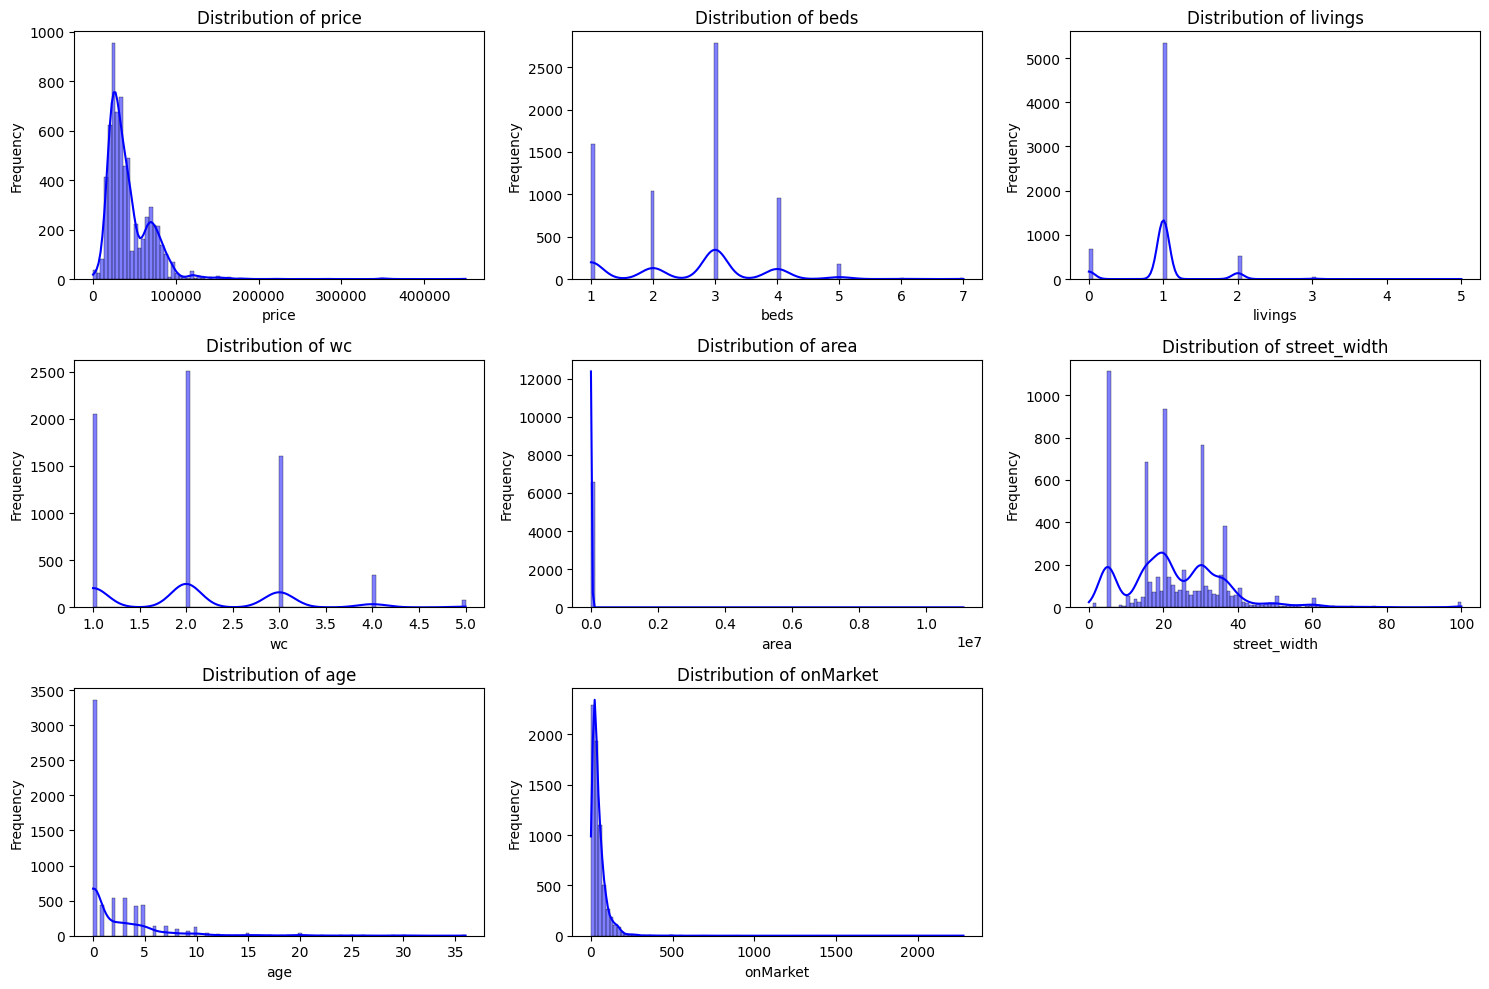

In [701]:
# List of columns to plot
columns_to_plot = ['price', 'beds', 'livings', 'wc', 'area', 'street_width', 'age', 'onMarket']

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Loop through the columns and plot histograms
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)  # 3 rows, 3 columns, i-th subplot
    sns.histplot(realEstate[column], kde=True, bins=100, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

# We consider outliar of Price value is nutural outliar

# We consider outliar of Beds value is nutural outliar

# We consider outliar of Beds value above 2 is outliar

# We consider outliar of wc value is nutural outliar 

# We consider outliar of Stret width value 100 is nutural outliar and 0 is outliar

# We consider outliar of age value is nutural outliar 

# We see the Area later

In [702]:
'''
Outlier Handling Rules
Price:

Outlier: Natural outliers (no specific threshold).

Action: Keep as-is.

Beds:

Outlier: Natural outliers (no specific threshold).

Action: Keep as-is.

WC:

Outlier: Natural outliers (no specific threshold).

Action: Keep as-is.

Street Width:

Outlier:

100 is a natural outlier.

0 is an outlier.

Action:

Keep 100 as-is.

Remove or handle 0 values.

Age:

Outlier: Natural outliers (no specific threshold).

Action: Keep as-is.

OnMarket:

Outlier: Natural outliers (no specific threshold).

Action: Keep as-is.

area:

Outlier: 

1100 is outlier.
Natural outliers (no specific threshold).

Action: Keep as-is.

'''


'\nOutlier Handling Rules\nPrice:\n\nOutlier: Natural outliers (no specific threshold).\n\nAction: Keep as-is.\n\nBeds:\n\nOutlier: Natural outliers (no specific threshold).\n\nAction: Keep as-is.\n\nWC:\n\nOutlier: Natural outliers (no specific threshold).\n\nAction: Keep as-is.\n\nStreet Width:\n\nOutlier:\n\n100 is a natural outlier.\n\n0 is an outlier.\n\nAction:\n\nKeep 100 as-is.\n\nRemove or handle 0 values.\n\nAge:\n\nOutlier: Natural outliers (no specific threshold).\n\nAction: Keep as-is.\n\nOnMarket:\n\nOutlier: Natural outliers (no specific threshold).\n\nAction: Keep as-is.\n\narea:\n\nOutlier: \n\n1100 is outlier.\nNatural outliers (no specific threshold).\n\nAction: Keep as-is.\n\n'

In [703]:
realEstate['area'].unique()
# realEstate['area'].max() , realEstate['area'].min()

array([     225,      130,      200,      120,       60,      170,
            600,      160,      150,        8,      180,      100,
            450,        1,       40,      500,      208,       50,
             80,       85,      156,      900,      240,      134,
             99,      210,      220,      166,      153,      133,
            110,      128,       70,       90,      400,      131,
             75,      125,      140,      204,      250,       11,
            145,      107,       20,       30,      280,      115,
            375,      219,      320,      275,      300,       35,
            168,      175,      172,        7,      146,      179,
            229,      174,      138,      190,      700,      102,
            360,      161,      177,      750,      195,       95,
            260,      155,      350,      237,      149,      186,
            192,      171,      105,       55,     1000,       92,
            185,        5,      124,       56,      425,      

In [704]:
# Calculate the 5th and 95th percentiles
lower_threshold = realEstate['area'].quantile(0.06)
upper_threshold = realEstate['area'].quantile(0.99)
lower_threshold , upper_threshold

(16.0, 700.0)

In [705]:
# Apply capping
realEstate['area'] = realEstate['area'].clip(lower= 16.0, upper=700.0)

## RiyadhVillasAqar

In [713]:
RiyadhVillasAqar.describe()

,Unnamed: 0,rooms,streetWidth,propertyAge,driverRoom,duplex,space,maidRoom,elevator,furnihsed,pool,basement,price,square price
count,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,46826.000000,4.682600e+04,46826.000000
mean,25915.132384,4.687439,18.158418,2.454790,0.355871,0.297698,380.021740,0.767821,0.235745,0.078738,0.116410,0.037671,2.347636e+06,6088.058800
std,14993.821359,1.104970,4.159402,6.496833,0.478781,0.457251,281.431272,0.422227,0.424468,0.269333,0.320719,0.190402,2.781993e+06,4515.748802
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.080000e+03,3.428571
25%,12925.250000,4.000000,15.000000,0.000000,0.000000,0.000000,270.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.180000e+06,3866.666667
50%,25836.500000,5.000000,20.000000,0.000000,0.000000,0.000000,312.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.600000e+06,5000.000000
75%,38917.750000,5.000000,20.000000,0.000000,1.000000,1.000000,400.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.600000e+06,7600.000000
max,51844.000000,7.000000,100.000000,35.000000,1.000000,1.000000,10000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+08,136144.578300


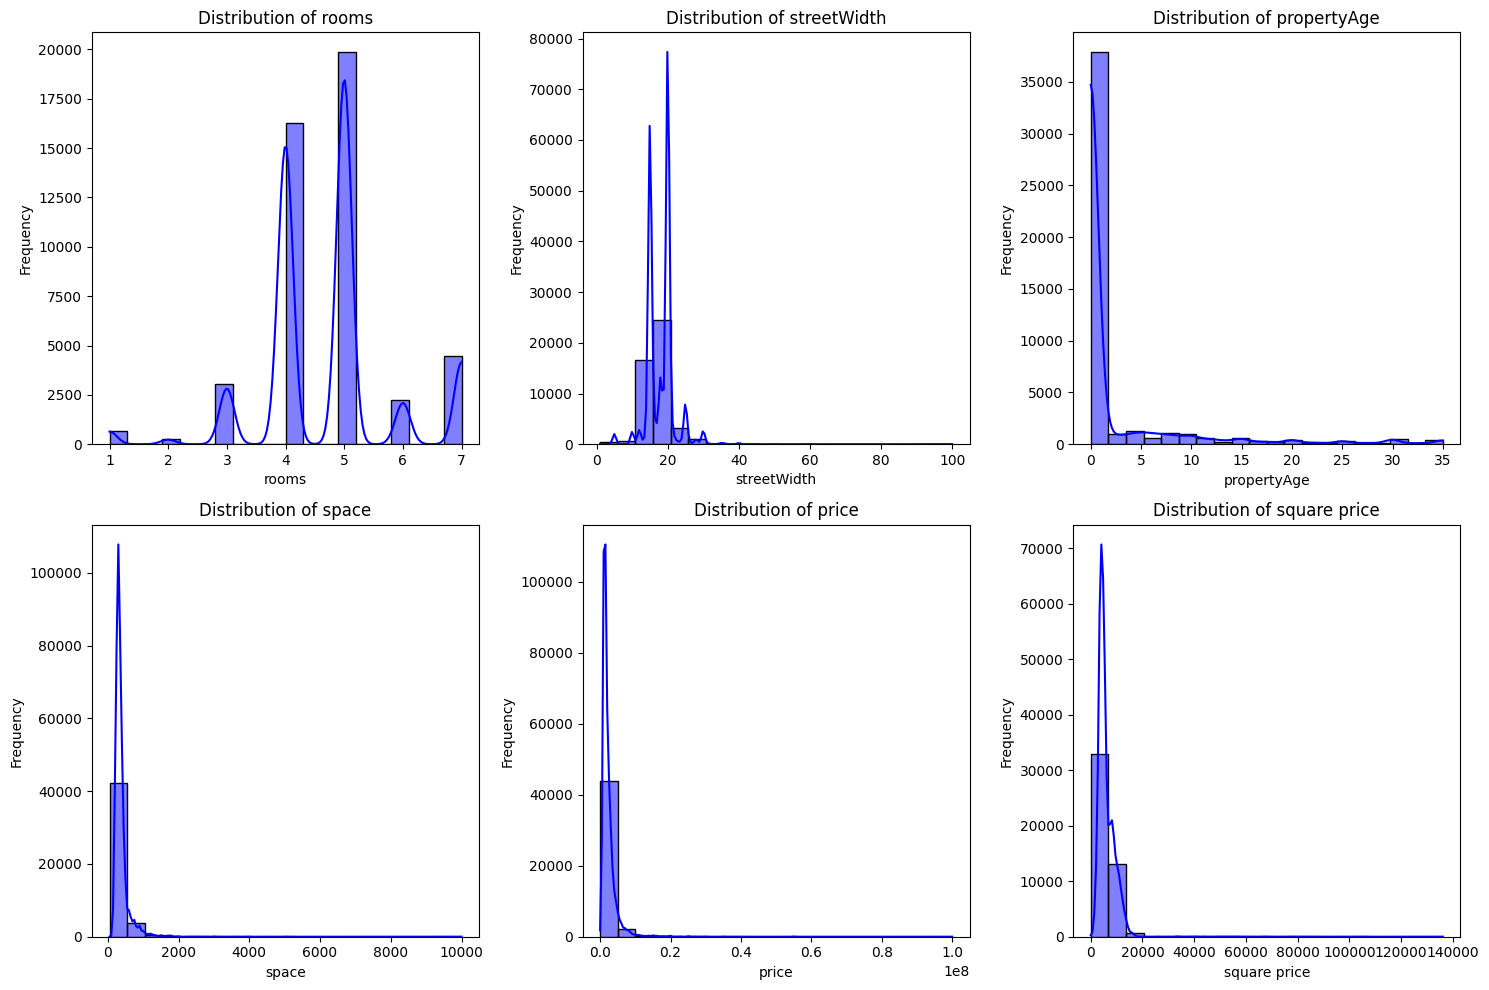

In [715]:
# List of columns to plot
columns_to_plot = ['rooms', 'streetWidth', 'propertyAge', 'space', 'price', 'square price']

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Loop through the columns and plot histograms
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns, i-th subplot
    sns.histplot(RiyadhVillasAqar[column], kde=True, bins=20, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [ ]:
# 'rooms': no outliars 
# 'streetWidth': normal
# 'propertyAge': normal
# 'space': above 1500
# 'price': above 15,000,000
# 'square price': 10000

## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & Categorical --> (Stacked Column Chart)**

**Categorical & numerical --> (scatter plot, histogram, box plot)**

**numerical & numerical --> (Scatter plot, line chart)**

We could also use a correlation matrix to get more specific information about the relationship between these two variables.